In [1]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
import re
from textblob import TextBlob
#from textblob.sentiments import NaiveBayesAnalyzer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('joker_new.csv', index_col=0)

In [3]:
df.head()

,Title,Content
1,Outstanding movie with a haunting performance...,"Every once in a while a movie comes, that tru..."
2,The Hype is real\n,Most of the time movies are anticipated like ...
3,Must have put a SMILE of Satisfaction on Heat...,"Truly a masterpiece, The Best film of 2019, o..."
4,Only certain people can relate\n,This is a movie that only those who have felt...
5,MASTERPIECE 😍\n,Joaquin Phoenix gives a tour de force perform...


In [4]:
my_string = df.Content.str.cat(sep=' ')

In [5]:
my_stopwords = set(STOPWORDS)
my_stopwords.update(['movie', 'movies', 'cinemas', 'theatre','br','tb', 
                     'film', 'Joker', 'joker', 'watch', 'go', 'thing', 'going',
                    'comic', 'book', 'say', 'people', 'think', 'make',
                     'really', 'need', 'year', 'month', 'makes','watching','see',
                    'way', 'look', 'looking', 'seeing', 'heath', 'ledger'])
my_stopwords = my_stopwords.union(ENGLISH_STOP_WORDS)

In [6]:
new_string = re.sub(r'[^\w]', ' ', my_string).lower()

In [7]:
my_cloud = WordCloud(background_color='WHITE', stopwords = my_stopwords, width=1000, height=800).generate(new_string)

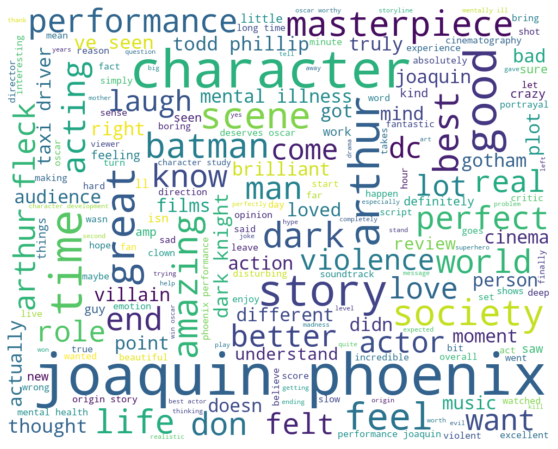

In [8]:
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

vect = TfidfVectorizer(stop_words=).fit(df.Content)
X = vect.transform(df.Content)

In [9]:
#using textblob to check the sentiment

my_sentiment = TextBlob(new_string)
# my_sentiment = TextBlob(new_string, analyzer=NaiveBayesAnalyzer())
my_sentiment.sentiment

Sentiment(polarity=0.16715042685649026, subjectivity=0.5539229696434953)

In [10]:
new_stopwords = frozenset(ENGLISH_STOP_WORDS.union(['movie', 'movies', 'cinemas', 'theatre','br','tb', 
                     'film', 'Joker', 'joker', 'watch', 'go', 'thing', 'going',
                    'comic', 'book', 'say', 'people', 'think', 'make',
                     'really', 'need', 'year', 'month', 'makes','watching','see',
                    'way', 'look', 'looking', 'seeing', 'heath', 'ledger', 'just', 'joaquin phoenix', 'joaquin', 'phoenix']))

In [11]:
#using Bag-of-words and ML

vect = TfidfVectorizer(stop_words = new_stopwords, ngram_range=(1, 2), min_df = 0.1).fit(df.Content)

In [12]:
X_vect = vect.transform(df.Content)

In [13]:
X_vect

<5968x18 sparse matrix of type '<class 'numpy.float64'>'
	with 17321 stored elements in Compressed Sparse Row format>

In [14]:
X_df = pd.DataFrame(X_vect.toarray(), columns = vect.get_feature_names())

In [15]:
X_df['Score'] = 0

In [16]:
len(X_df.columns)

19

In [17]:
X_df.head()

,acting,amazing,arthur,best,character,dark,don,feel,good,great,like,masterpiece,oscar,performance,seen,society,story,time,Score
0,0.00000,0.0,0.0,0.404873,0.427093,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.409399,0.506358,0.0,0.0,0.479232,0
1,0.00000,0.0,0.0,0.000000,0.000000,0.626760,0.000000,0.000000,0.0,0.0,0.294197,0.000000,0.000000,0.000000,0.337047,0.0,0.0,0.637982,0
2,0.27567,0.0,0.0,0.792587,0.278695,0.000000,0.333139,0.000000,0.0,0.0,0.000000,0.327352,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
3,0.00000,0.0,0.0,0.000000,0.245911,0.000000,0.000000,0.935289,0.0,0.0,0.254484,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0
4,0.00000,0.0,0.0,0.000000,0.000000,0.707603,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.347398,0.615315,0.000000,0.0,0.0,0.000000,0


In [18]:
words = ['amazing', 'best', 'good', 'great']

In [19]:
for i in range(len(X_df)):
    for j in words:
        val = X_df.loc[i, j]
        if val > 0.5:
            X_df.at[i, 'Score'] = 1
            break
            

In [21]:
X_df.loc[X_df.Score == 0].shape

(3938, 19)

In [22]:
y = X_df.Score
X = X_df.drop(['Score'], axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 420)

In [24]:
log_reg = LogisticRegression(penalty = 'l2', C=1000).fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
y_predict = log_reg.predict(X_test)
print("The accuracy of the model is: ", accuracy_score(y_predict, y_test))

The accuracy of the model is:  0.9221105527638191


In [26]:
print('The confusion matrix is: ')
print(confusion_matrix(y_test, y_predict)/len(y_test))

The confusion matrix is: 
[[0.62897822 0.03685092]
 [0.04103853 0.29313233]]
